In [2]:
import sys
import glob
import os
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import glob
%matplotlib inline
plt.style.use('ggplot')

In [3]:
def process_dir(dir):
    first_capdelay = None
    first_quota    = None

    df = pd.DataFrame(columns=('nclients', 'capdelay', 'quota', 'nops', 'avglat'))

    results = glob.glob("%s/*.nc-*.cd-*.qa-*.*.*" % (dir,))
    for path in results:
        filename = os.path.basename(path)
        m = re.match(".*nc-(?P<nc>\d+).cd-(?P<cd>\d+.\d+).qa-(?P<qa>\d+).(?P<ts>\d+).(?P<pid>\d+)", filename)
        nclients = int(m.group("nc"))
        capdelay = float(m.group("cd"))
        quota    = int(m.group("qa"))
        pid      = int(m.group("pid"))
        tstamp   = int(m.group("ts"))
    
        if first_capdelay is None:
            first_capdelay = capdelay
        if first_quota is None:
            first_quota = quota
        assert capdelay == first_capdelay
        assert quota == first_quota
    
        f = open(path)
        nops = int(float(f.readline().strip()))
        alat = int(float(f.readline().strip()))
    
        tmp = pd.DataFrame({
                'nclients': [nclients],
                'capdelay': [capdelay],
                'quota':    [quota],
                'nops':     [nops],
                'avglat':   [alat]})
        df = df.append(tmp)
    
        print filename, nclients, capdelay, quota, pid, tstamp, nops, alat
        
    df2 = df.groupby('nclients').mean()
    df2['sumnops'] = df.groupby('nclients').sum()['nops']
    df2['avglatus'] = df2['avglat'] / 1000.0
    print df2
    ax = df2[['nops', 'sumnops', 'avglatus']].plot.bar(secondary_y=['avglatus'])
    ax.set_yscale('log')
    ax.set_ylabel('Throughput (Ops/Sec)')
    ax.right_ax.set_ylabel('Latency (us)')
    #ax.right_ax.set_yscale('log')
    ax.set_title(dir)

best_effort.nc-1.cd-0.0.qa-0.1476846043.32461 1 0.0 0 32461 1476846043 2583697 354
best_effort.nc-16.cd-0.0.qa-0.1476846283.32732 16 0.0 0 32732 1476846283 21484 46500
best_effort.nc-16.cd-0.0.qa-0.1476846283.32733 16 0.0 0 32733 1476846283 1937 515978
best_effort.nc-16.cd-0.0.qa-0.1476846283.32734 16 0.0 0 32734 1476846283 5530 180784
best_effort.nc-16.cd-0.0.qa-0.1476846283.32735 16 0.0 0 32735 1476846283 10156 98416
best_effort.nc-16.cd-0.0.qa-0.1476846283.32737 16 0.0 0 32737 1476846283 5703 175280
best_effort.nc-16.cd-0.0.qa-0.1476846283.32739 16 0.0 0 32739 1476846283 7847 127379
best_effort.nc-16.cd-0.0.qa-0.1476846283.32741 16 0.0 0 32741 1476846283 19517 51192
best_effort.nc-16.cd-0.0.qa-0.1476846283.32743 16 0.0 0 32743 1476846283 23565 42389
best_effort.nc-16.cd-0.0.qa-0.1476846283.32745 16 0.0 0 32745 1476846283 14758 67715
best_effort.nc-16.cd-0.0.qa-0.1476846283.32747 16 0.0 0 32747 1476846283 12390 80664
best_effort.nc-16.cd-0.0.qa-0.1476846283.32750 16 0.0 0 32750 14768

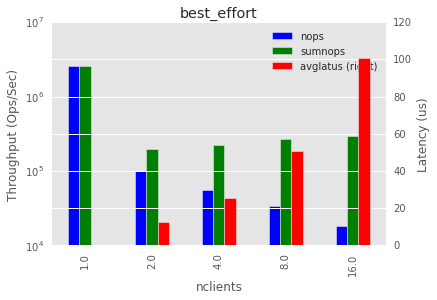

In [4]:
process_dir('best_effort')

In [5]:
def process_dir2(dir):
    first_capdelay = None
    first_quota    = None
    first_nclients = None

    df = pd.DataFrame(columns=('nclients', 'capdelay', 'quota', 'nops', 'avglat'))

    results = glob.glob("%s/*.nc-*.cd-*.qa-*.*.*" % (dir,))
    for path in results:
        filename = os.path.basename(path)
        m = re.match(".*nc-(?P<nc>\d+).cd-(?P<cd>\d+.\d+).qa-(?P<qa>\d+).(?P<ts>\d+).(?P<pid>\d+)", filename)
        nclients = int(m.group("nc"))
        capdelay = float(m.group("cd"))
        quota    = int(m.group("qa"))
        pid      = int(m.group("pid"))
        tstamp   = int(m.group("ts"))
    
        if first_nclients is None:
            first_nclients = nclients
        if first_quota is None:
            first_quota = quota
        assert nclients == first_nclients
        assert quota == first_quota
    
        f = open(path)
        nops = int(float(f.readline().strip()))
        alat = int(float(f.readline().strip()))
    
        tmp = pd.DataFrame({
                'nclients': [nclients],
                'capdelay': [capdelay],
                'quota':    [quota],
                'nops':     [nops],
                'avglat':   [alat]})
        df = df.append(tmp)
    
        print filename, nclients, capdelay, quota, pid, tstamp, nops, alat

    df2 = df.groupby('capdelay').mean()
    df2['sumnops'] = df.groupby('capdelay').sum()['nops']
    df2['avglatus'] = df2['avglat'] / 1000.0
    print df2
    ax = df2[['nops', 'sumnops', 'avglatus']].plot.bar(secondary_y=['avglatus'])
    ax.set_yscale('log')
    ax.set_ylabel('Throughput (Ops/Sec)')
    ax.right_ax.set_ylabel('Latency (us)')
    #ax.right_ax.set_yscale('log')
    ax.set_title(dir)

4c_shrink_capdelay.nc-4.cd-0.00048828125.qa-0.1476911199.44772 4 0.00048828125 0 44772 1476911199 195994 5057
4c_shrink_capdelay.nc-4.cd-0.00048828125.qa-0.1476911199.44773 4 0.00048828125 0 44773 1476911199 195067 5082
4c_shrink_capdelay.nc-4.cd-0.00048828125.qa-0.1476911199.44774 4 0.00048828125 0 44774 1476911199 193615 5120
4c_shrink_capdelay.nc-4.cd-0.00048828125.qa-0.1476911199.44775 4 0.00048828125 0 44775 1476911199 195922 5060
4c_shrink_capdelay.nc-4.cd-0.0009765625.qa-0.1476911079.44692 4 0.0009765625 0 44692 1476911079 250089 3954
4c_shrink_capdelay.nc-4.cd-0.0009765625.qa-0.1476911079.44693 4 0.0009765625 0 44693 1476911079 252921 3909
4c_shrink_capdelay.nc-4.cd-0.0009765625.qa-0.1476911079.44694 4 0.0009765625 0 44694 1476911079 254234 3889
4c_shrink_capdelay.nc-4.cd-0.0009765625.qa-0.1476911079.44695 4 0.0009765625 0 44695 1476911079 249070 3971
4c_shrink_capdelay.nc-4.cd-0.001953125.qa-0.1476910959.44619 4 0.001953125 0 44619 1476910959 272478 3622
4c_shrink_capdelay.nc-

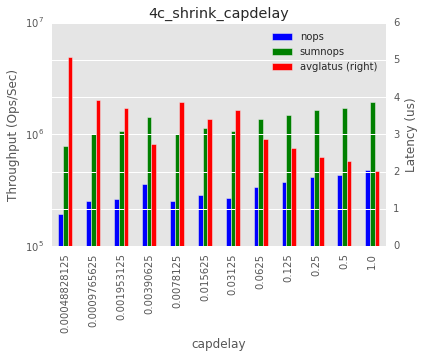

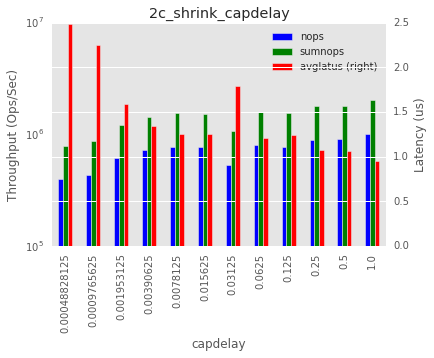

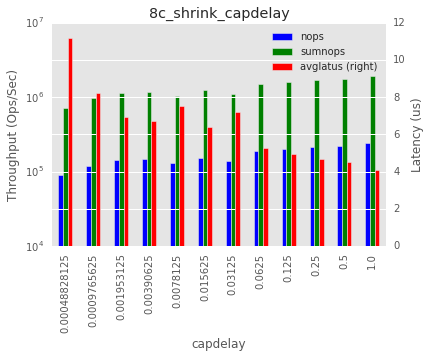

In [6]:
df = process_dir2('4c_shrink_capdelay')
df = process_dir2('2c_shrink_capdelay')
df = process_dir2('8c_shrink_capdelay')

In [13]:
def read_trace(of):
    percents, latencies = [], []
    for cdf_line in of.readlines():
        cdf_line = cdf_line.split(",")
        assert len(cdf_line) == 2
        latency = long(cdf_line[0].strip())
        percent = float(cdf_line[1].strip())
        percents.append(percent)
        latencies.append(latency / 1000.0)
    return pd.DataFrame({'pct': percents, 'lat': latencies})

#fig, ax = plt.subplots()
#ax.set_xscale('log')
#ax.set_xlabel('Latency (ms)')
#ax.set_ylabel('Probability')

#iops, cdf = read_trace('1cl_zlogseqr_60s.csv')
#iopss.append(('1C,ZLog', iops))
#ax.plot(cdf.lat, cdf.pct, label='1C,ZLog')
#ax.plot(cdfs[0].lat, cdfs[0].pct, label='2C,100us')

from collections import defaultdict

plt.figure(figsize=(7,2))

def process_dir3(dir):
    first_capdelay = None
    first_quota    = None
    first_nclients = None
    
    cdfs = defaultdict(lambda: [])

    df = pd.DataFrame(columns=('nclients', 'capdelay', 'quota', 'nops', 'avglat'))

    results = glob.glob("%s/*.nc-*.cd-*.qa-*.*.*" % (dir,))
    for path in results:
        filename = os.path.basename(path)
        m = re.match(".*nc-(?P<nc>\d+).cd-(?P<cd>\d+.\d+).qa-(?P<qa>\d+).(?P<ts>\d+).(?P<pid>\d+)", filename)
        nclients = int(m.group("nc"))
        capdelay = float(m.group("cd"))
        quota    = int(m.group("qa"))
        pid      = int(m.group("pid"))
        tstamp   = int(m.group("ts"))
    
        if first_nclients is None:
            first_nclients = nclients
        if first_capdelay is None:
            first_capdelay = capdelay
        assert nclients == first_nclients
        assert capdelay == first_capdelay
    
        f = open(path)
        nops = int(float(f.readline().strip()))
        alat = int(float(f.readline().strip()))
        
        cdf = read_trace(f)
        cdfs[quota].append(cdf)
        
        #yerr.append(max(dfl[dfl.pct < 0.95].lat))
    
        tmp = pd.DataFrame({
                'nclients': [nclients],
                'capdelay': [capdelay],
                'quota':    [quota],
                'nops':     [nops],
                'avglat':   [alat],
                'yerrmax':  [max(cdf[cdf.pct < 0.95].lat)]})
        df = df.append(tmp)
    
        #print filename, nclients, capdelay, quota, pid, tstamp, nops, alat

    yerr = []

    plt.rcParams['figure.figsize'] = 7,2

    figl, axl = plt.subplots()
    axl.set_xscale('log')
    #axl.set_yscale('log')
    axl.set_xlabel('Latency (us)')
    axl.set_ylabel('Probability')
    for quota, cdf in cdfs.items():
        count = 0
        for dfl in cdf:
            label = "%dq-c%d" % (quota, count)
            #print label
            print label, min(dfl.lat), max(dfl[dfl.pct < 0.99].lat)
            dfx = dfl[dfl.pct < 0.99999]
            axl.plot(dfx.lat, dfx.pct, label=label)
            count += 1
            pass
        pass

    df['Quota'] = df['quota']
    #df['yerr'] = yerr
    #print df.groupby('Quota').max()
    
    df2 = df.groupby('Quota').mean()
    df2['sumnops'] = df.groupby('Quota').sum()['nops']
    df2['yerrmax'] = df.groupby('Quota').max()['yerrmax']
    df2['avglatus'] = df2['avglat'] / 1000.0
    
    df2['Total Op/s'] = df2['sumnops']
    df2['Client Op/s'] = df2['nops']
    df2['Average Latency'] = df2['avglatus']
    ax = df2[['Total Op/s', 'Average Latency']].plot.bar(secondary_y=['Average Latency'], color=['red', 'blue'])
    ax.set_yscale('log')
    ax.set_ylabel('Throughput (Ops/Sec)')
    ax.right_ax.set_ylabel('Latency (us)')
    #ax.right_ax.set_yscale('log')
    #ax.set_title('2 Clients '
    
    #ax.legend(loc='best')
    #ax.right_ax.legend(loc='best')

    xlabels = [item.get_text() for item in ax.get_xticklabels()]
    new_xlabels = [ "%d" % int(float(l)) for l in xlabels]
    ax.set_xticklabels(new_xlabels)
    
    plt.savefig('tradeoff.png', dpi=300, bbox_inches='tight')

100000q-c0 0.36 0.933
100000q-c1 0.36 0.933
1q-c0 0.401 899.813
1q-c1 0.384 21.644
100q-c0 0.492 15.352
100q-c1 0.492 851.864
1000q-c0 0.468 1.168
1000q-c1 0.49 1.7
10q-c0 0.389 23.224
10q-c1 0.387 869.242
10000q-c0 0.403 0.939
10000q-c1 0.49 0.928
1000000q-c0 0.354 0.933
1000000q-c1 0.36 0.929


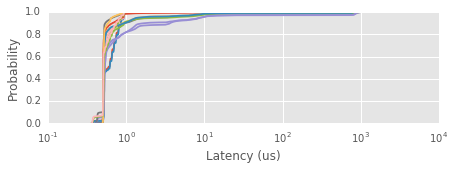

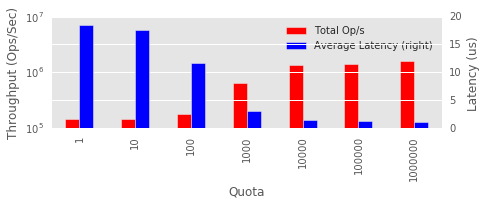

In [14]:
process_dir3('2c_0.25s_increase_quota2')